In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 40.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Tutorial

- https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [16]:
street_map = gpd.read_file('/Users/haley.northrup/Desktop/PeopleCenteredCOS/elpaso_geodata_parcels/Parcels/Parcels.shp')

<Axes: >

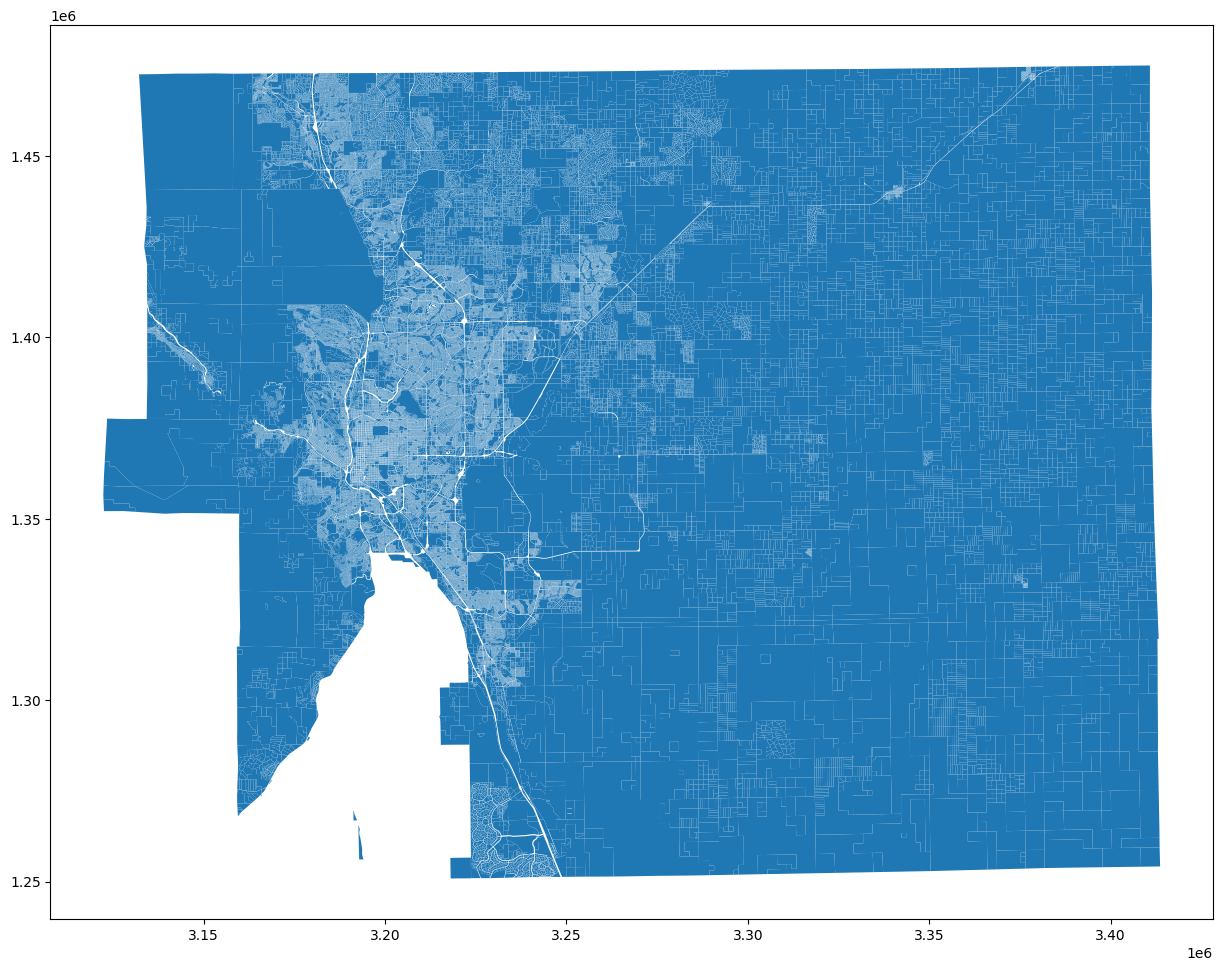

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [18]:
years = [2021]
cdot_base_path = "/Users/haley.northrup/Desktop/PeopleCenteredCOS/cdot_data/"

loaded_dfs = []
for year in years:
    filename = f"CDOTRM_CD_Crash_Listing_-_{year}.xlsx"

    full_path = cdot_base_path + filename
    print(full_path)

    temp_cdot_pdf = pd.read_excel(cdot_base_path + filename)
    loaded_dfs.append(temp_cdot_pdf)

# combine sheets 
cdot_pdf = pd.concat(loaded_dfs)

print(cdot_pdf['Crash Date'].nunique())

/Users/haley.northrup/Desktop/PeopleCenteredCOS/cdot_data/CDOTRM_CD_Crash_Listing_-_2021.xlsx
365


In [25]:
# LIMIT DATA 
cdot_pdf_small = cdot_pdf.loc[cdot_pdf['County'] == 'EL PASO'].head(10)


In [26]:
geometry = [Point(xy) for xy in zip(cdot_pdf_small['Longitude'], cdot_pdf_small['Latitude'])]

In [27]:
crs = {'init':'epsg:4326'}

geo_df = gpd.GeoDataFrame(cdot_pdf_small, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CUID,System Code,Rd_Number,Rd_Section,City_Street,Crash Date,Crash Time,Agency Id,City,County,...,TU-1 NM Alcohol Suspected,TU-2 NM Alcohol Suspected,TU-1 NM Marijuana Suspected,TU-2 NM Marijuana Suspected,TU-1 NM Other Drugs Suspected,TU-2 NM Other Drugs Suspected,Record Status,Processing Status,Last Updated,geometry
6,40969,City Street,0240,ANTRI,CELTI,2021-01-01,00:35:00,CSPD,COLORADO SPRINGS,EL PASO,...,NaN,NaN,NaN,NaN,NaN,NaN,Coded,Completed,Mar 6 2021 4:54AM,POINT (-104.78369 38.81404)
8,45992,City Street,0240,DUBLI,TEMPL,2021-01-01,00:45:00,CSPD,COLORADO SPRINGS,EL PASO,...,NaN,NaN,NaN,NaN,NaN,NaN,Coded,Completed,Mar 6 2021 5:01AM,POINT (-104.72211 38.92678)
27,40375,City Street,0915,WINDI,006HX,2021-01-01,02:57:00,CSP,MONUMENT,EL PASO,...,NaN,NaN,NaN,NaN,NaN,NaN,Coded,Completed,Jul 16 2021 4:02PM,POINT EMPTY
33,42086,County Road,0400,GOLDF,061HX,2021-01-01,04:13:00,CSP,NaN,EL PASO,...,NaN,NaN,NaN,NaN,NaN,NaN,Coded,Completed,Mar 24 2023 11:55PM,POINT EMPTY
35,42851,City Street,0240,CIRCL,CORTE,2021-01-01,04:15:00,CSPD,COLORADO SPRINGS,EL PASO,...,NaN,NaN,NaN,NaN,NaN,NaN,Coded,Completed,Mar 6 2021 4:57AM,POINT (-104.77585 38.84557)


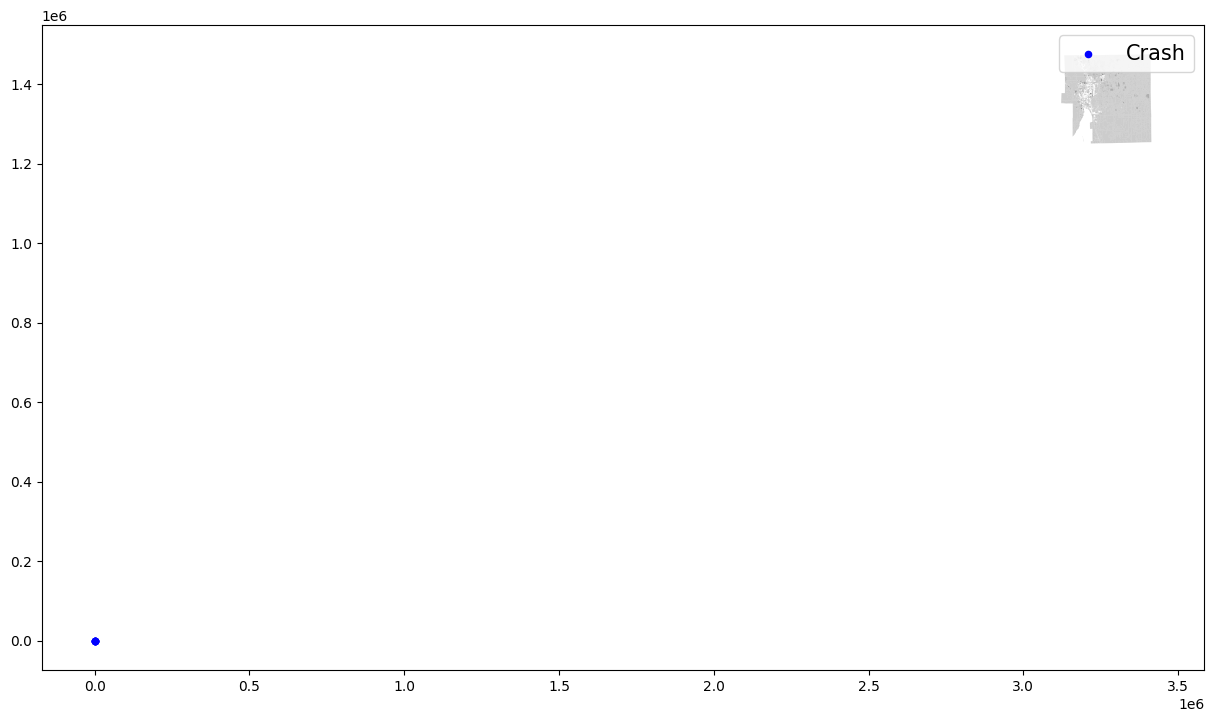

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
            markersize=20, 
            color='blue', 
            marker='o', 
            label='Crash')
plt.legend(prop={'size':15})